In [1]:
%pip install pybaseball

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.6/362.6 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 25.9 MB/s eta 0:00:00


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from pybaseball import batting_stats

In [6]:
batting_2023 = batting_stats(2023)
batting_2022 = batting_stats(2022)

batting_2023 = batting_2023[['Name','R']]
batting_2022 = batting_2022[['Name','R']]

paired_data = pd.merge(batting_2022, batting_2023, on='Name', suffixes=('_2022', '_2023'), how='outer')

print(len(paired_data))
paired_data.head()

178


,Name,R_2022,R_2023
0,A.J. Pollock,61.0,NaN
1,Aaron Judge,133.0,NaN
2,Adam Frazier,61.0,NaN
3,Adley Rutschman,NaN,84.0
4,Adolis Garcia,88.0,108.0


In [7]:
# delete nans

print(len(paired_data))
paired_data = paired_data.dropna(subset=['R_2022', 'R_2023'])
print(len(paired_data))

178
86


In [18]:
mean_2022 = np.mean(paired_data['R_2022'])
mean_2023 = np.mean(paired_data['R_2023'])
print(f'Mean 2022: {mean_2022}')
print(f'Mean 2023: {mean_2023}')

Mean 2022: 78.55813953488372
Mean 2023: 83.46511627906976


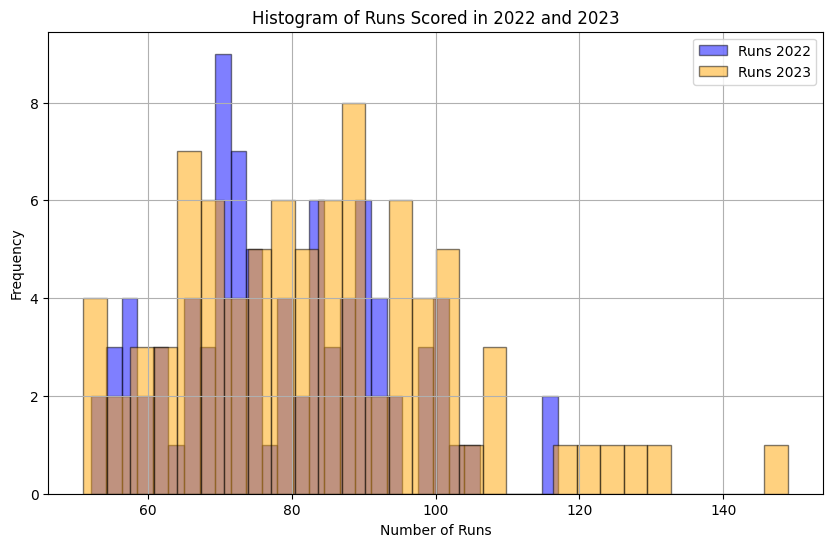

In [17]:
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(paired_data['R_2022'], bins=30, alpha=0.5, label='Runs 2022', color='blue', edgecolor='black')
plt.hist(paired_data['R_2023'], bins=30, alpha=0.5, label='Runs 2023', color='orange', edgecolor='black')

# Add labels and title
plt.xlabel('Number of Runs')
plt.ylabel('Frequency')
plt.title('Histogram of Runs Scored in 2022 and 2023')
plt.legend()
plt.grid()

# Show the plot
plt.show()

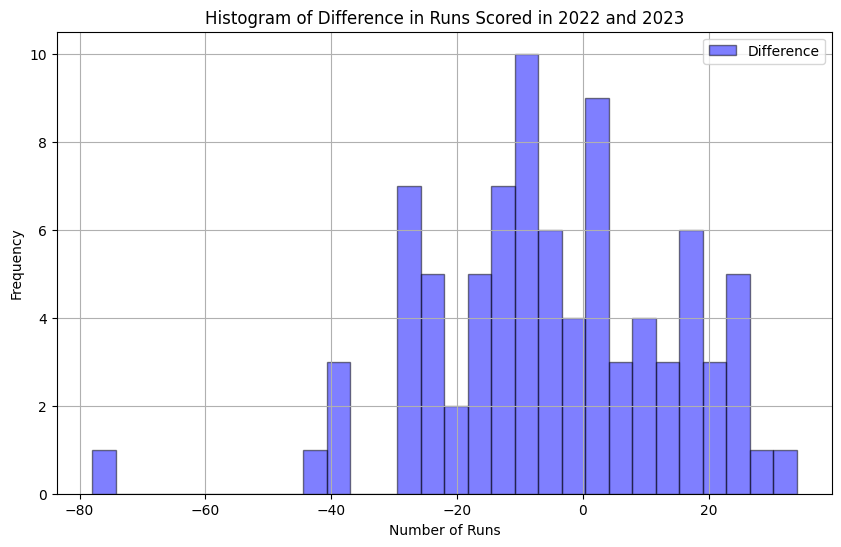

In [19]:
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(paired_data['R_2022'] - paired_data['R_2023'], bins=30, alpha=0.5, label='Difference', color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Number of Runs')
plt.ylabel('Frequency')
plt.title('Histogram of Difference in Runs Scored in 2022 and 2023')
plt.legend()
plt.grid()

# Show the plot
plt.show()

Assume the differences are normally distributed. The null hypothesis is that players scored the same number of runs in 2022 as 2023. The alternate hypothesis is that players scored different number of runs in 2022 as 2023. For this test we will use a two tailed t test.

In [20]:
differences = paired_data['R_2022'] - paired_data['R_2023']

mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)  # Sample standard deviation
n = len(differences)

t_statistic = mean_diff / (std_diff / np.sqrt(n))

# Two-tailed t-test
#p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=len(differences) - 1))

# Left-tailed t-test
#p_value = stats.t.cdf(t_statistic, df=len(differences) - 1)

# Right-tailed t-test
p_value = 1 - stats.t.cdf(t_statistic, df=len(differences) - 1)

print(f'Mean diff: {mean_diff}')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

Mean diff: -4.906976744186046
T-statistic: -2.36649526184564
P-value: 0.9898847464091622


Since the p value is less than the significance level of 0.05 we reject the null hypothesis. Players who played in both years scored more runs in 2023 than 2022.